# Sto-ZhOpt
In this notebook, we present some synthetic experiments which can be performed with stozhopt

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from stozhopt import StoZhOpt


rnd_state = np.random.RandomState(12)

## Preliminaries
We define some functions that will be used to plot results

In [29]:
def set_ax(ax, title, S, directions):
    ax.set_title(title, fontsize=14)
    for i in range(S.shape[0]):
        ax.plot(range(S.shape[1]), S[i], label="$l = ${}".format(directions[i]))

    ax.set_xlabel("$T$")
    ax.set_ylabel("$f(x_t)$")
    ax.set_yscale("log")
    ax.legend(loc="best")
    return ax

def plot_modes(title, S_coord, S_spherical, directions):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
    ax1 = set_ax(ax1, title + ": Coordinate Directions", S_coord, directions)
    ax2 = set_ax(ax2, title + ": Spherical Smoothing", S_spherical, directions)
    


In [22]:
def optimize(target_fun, directions, mode, T, alphas, hs):
    S = np.zeros(shape=(len(directions), T+1))

    x0 = rnd_state.rand(d)
    for i in range(len(directions)):
        x = x0
        l = directions[i]
        alpha = alphas[i]
        h = hs[i]
#        print("[--] l: {}\talpha: {}: {}".format(l, alpha, type(alpha)))
        optimizer = StoZhOpt(mode, d, l, alpha, h, dtype=np.float32, seed=12)
        S[i][0] = target_fun(x)
        for t in range(1, T+1):
            x = optimizer.step(fun=target_fun, x=x)
            S[i][t] = target_fun(x)
 #           print("\t[l = {}] f(x)= {}".format(l, target_fun(x)))
        optimizer.reset()
    return S

## Example: Strongly Convex Function
First, we consider to optimize a convex function varying the number of directions taken. We'll consider the following function:

$$ f(x) = || Ax||^2 $$

with $A$ a random fixed matrix

In [4]:
d = 100
A = rnd_state.normal(0.0, 1.00, size=(d, d)) 
U, S, V = np.linalg.svd(A)

#S[-1] = 0
#A = U @ np.diag(S) @ V
w, _ = np.linalg.eigh(A.T @ A)

L = np.max(w)


target_fun = lambda x: 1/2 * np.linalg.norm(A @ x)**2#1/2*np.linalg.norm(A.dot(x))**2

In [25]:
T = 300

directions = [1, 15, 50, 75, 100]
alphas = [l/(d*L) for l in directions]
hs = [1e-8 for _ in directions]

S_coord = optimize(target_fun, directions, "coordinate", T, alphas, hs)
S_spherical = optimize(target_fun, directions, "spherical", T, alphas, hs)


### Plot results

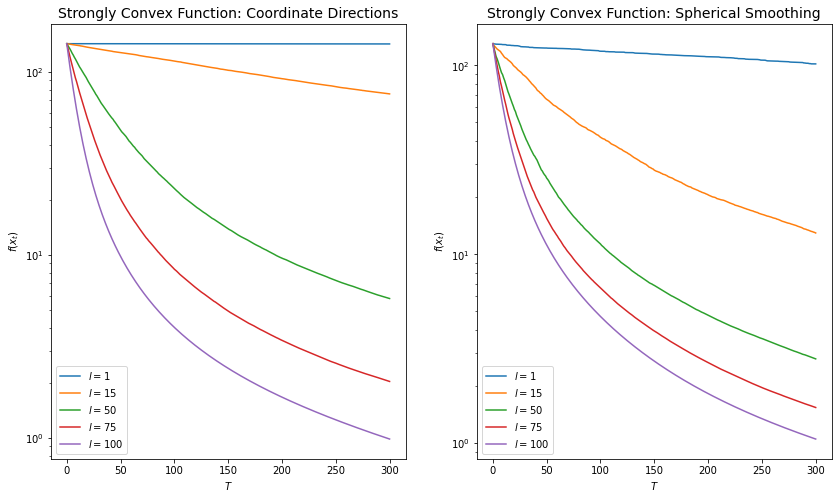

In [30]:
plot_modes("Strongly Convex Function", S_coord, S_spherical, directions)

## PL-Function

In [7]:
d = 100
A = rnd_state.normal(0.0, 0.20, size=(d, d)) 
U, S, V = np.linalg.svd(A)

S[-1] = 0

A = U @ np.diag(S) @ V


target_fun = lambda x: np.linalg.norm(A @ x)**2#1/2*np.linalg.norm(A.dot(x))**2